In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import socket

In [2]:
!ls

build_viz.py		outbound_concrete_dropout_predictions.parq
Combine Data.ipynb	_output
Data Exploration.ipynb	submit_proc.sh
data_processing.py	submit_read.sh
data_read.py		submit_split.sh
data_split.py		submit_viz.sh


In [3]:
idata_test = pd.read_parquet('/data/alexander.huang/data/0903_data/inbound_read_test.parq')
idata_val = pd.read_parquet('/data/alexander.huang/data/0903_data/inbound_read_val.parq')
idata_train = pd.read_parquet('/data/alexander.huang/data/0903_data/inbound_read_train.parq')

In [4]:
odata_test = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_test.parq')
odata_val = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_val.parq')
odata_train = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_train.parq')

In [5]:
print(len(odata_test))

3600000


In [6]:
odata_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600000 entries, 60000 to 7199999
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   packet_label          uint8  
 1   outside_timestamp     float64
 2   outside_ip_protocol   uint8  
 3   outside_ip_len        uint16 
 4   outside_ip_src        uint32 
 5   outside_ip_dst        uint32 
 6   outside_port_src      uint16 
 7   outside_port_dst      uint16 
 8   outside_tcp_win_size  uint32 
 9   outside_tcp_flags     uint16 
 10  outside_ip_ttl        uint8  
 11  inside_timestamp      float64
 12  inside_ip_protocol    uint8  
 13  inside_ip_len         uint16 
 14  inside_ip_src         uint32 
 15  inside_ip_dst         uint32 
 16  inside_port_src       uint16 
 17  inside_port_dst       uint16 
 18  inside_tcp_win_size   uint32 
 19  inside_tcp_flags      uint16 
 20  inside_ip_ttl         uint8  
dtypes: float64(2), uint16(8), uint32(6), uint8(5)
memory usage: 236.9 MB


In [7]:
corr = odata_test.corr()
corr

,packet_label,outside_timestamp,outside_ip_protocol,outside_ip_len,outside_ip_src,outside_ip_dst,outside_port_src,outside_port_dst,outside_tcp_win_size,outside_tcp_flags,...,inside_timestamp,inside_ip_protocol,inside_ip_len,inside_ip_src,inside_ip_dst,inside_port_src,inside_port_dst,inside_tcp_win_size,inside_tcp_flags,inside_ip_ttl
packet_label,1.000000,-1.000000,-0.277201,-0.157584,-0.999994,-0.225510,-0.257739,-0.044662,-0.024709,-0.263506,...,-0.011551,0.290362,-0.091268,-0.036360,-0.150778,-0.208290,0.347628,-0.023859,-0.252001,-0.201906
outside_timestamp,-1.000000,1.000000,0.277201,0.157584,0.999994,0.225511,0.257739,0.044662,0.024709,0.263506,...,0.011555,-0.290362,0.091269,0.036360,0.150779,0.208290,-0.347628,0.023859,0.252002,0.201907
outside_ip_protocol,-0.277201,0.277201,1.000000,0.130216,0.276930,-0.096235,-0.002568,0.136241,-0.058111,-0.619707,...,-0.071702,0.832214,0.112448,0.072086,-0.118119,-0.124365,0.017098,-0.058376,-0.622726,0.161773
outside_ip_len,-0.157584,0.157584,0.130216,1.000000,0.157555,-0.079610,0.065585,0.098181,-0.106001,-0.057798,...,0.099033,0.039797,0.975711,0.072054,-0.092234,0.062194,0.028710,-0.106232,-0.060952,0.173893
outside_ip_src,-0.999994,0.999994,0.276930,0.157555,1.000000,0.225457,0.258200,0.043146,0.024741,0.263424,...,0.011609,-0.290627,0.091240,0.035846,0.150725,0.209729,-0.349014,0.023891,0.251920,0.202265
outside_ip_dst,-0.225510,0.225511,-0.096235,-0.079610,0.225457,1.000000,0.186617,0.019418,-0.057579,0.188891,...,0.095225,-0.222428,-0.095207,0.016503,0.990133,0.160308,-0.069832,-0.057963,0.186253,0.126730
outside_port_src,-0.257739,0.257739,-0.002568,0.065585,0.258200,0.186617,1.000000,-0.191339,-0.011114,0.109802,...,0.033330,-0.148012,0.048901,-0.032883,0.168302,0.287151,-0.275415,-0.011120,0.106852,0.096254
outside_port_dst,-0.044662,0.044662,0.136241,0.098181,0.043146,0.019418,-0.191339,1.000000,-0.030850,-0.081306,...,-0.005375,0.109489,0.095810,0.206839,0.016149,-0.615042,0.898682,-0.030947,-0.081816,-0.130845
outside_tcp_win_size,-0.024709,0.024709,-0.058111,-0.106001,0.024741,-0.057579,-0.011114,-0.030850,1.000000,0.045201,...,-0.012755,-0.071399,-0.108272,-0.021900,-0.059891,0.037535,-0.037860,0.996132,0.044892,0.015344
outside_tcp_flags,-0.263506,0.263506,-0.619707,-0.057798,0.263424,0.188891,0.109802,-0.081306,0.045201,1.000000,...,0.038168,-0.761416,-0.077173,-0.031893,0.170152,0.174425,-0.176861,0.044983,0.992089,-0.054582


In [8]:
corr = idata_test.corr()
corr

,packet_label,outside_timestamp,outside_ip_protocol,outside_ip_len,outside_ip_src,outside_ip_dst,outside_port_src,outside_port_dst,outside_tcp_win_size,outside_tcp_flags,...,inside_timestamp,inside_ip_protocol,inside_ip_len,inside_ip_src,inside_ip_dst,inside_port_src,inside_port_dst,inside_tcp_win_size,inside_tcp_flags,inside_ip_ttl
packet_label,1.000000,-0.036257,0.276517,-0.102488,-0.077133,-0.018236,0.104756,-0.006098,-0.025951,-0.260635,...,-1.000000,-0.249697,-0.235425,-0.190978,-0.717535,-0.038100,-0.630704,-0.029346,-0.271172,-0.230688
outside_timestamp,-0.036257,1.000000,-0.066012,0.000370,0.071235,0.001436,0.002958,0.049272,-0.007180,0.044482,...,0.036261,-0.046773,0.004612,0.074066,0.014515,0.006853,0.049035,-0.006811,0.044322,0.079252
outside_ip_protocol,0.276517,-0.066012,1.000000,-0.258092,-0.211681,-0.010931,0.232686,0.022732,-0.095412,-0.883273,...,-0.276517,0.857171,-0.289094,-0.238382,-0.159176,0.215131,-0.326392,-0.095418,-0.881719,-0.068177
outside_ip_len,-0.102488,0.000370,-0.258092,1.000000,0.150789,0.102968,-0.181208,-0.015416,-0.066231,0.123315,...,0.102488,-0.208466,0.956014,0.160963,0.045219,-0.166510,0.150098,-0.065606,0.124025,-0.169928
outside_ip_src,-0.077133,0.071235,-0.211681,0.150789,1.000000,-0.008427,-0.015542,0.085112,-0.151979,0.200610,...,0.077134,-0.171339,0.158310,0.992284,0.042142,-0.011525,0.081291,-0.152089,0.200919,-0.079718
outside_ip_dst,-0.018236,0.001436,-0.010931,0.102968,-0.008427,1.000000,-0.534850,0.100995,0.013344,-0.037679,...,0.018236,-0.009466,0.100435,-0.002470,-0.061023,-0.524314,0.302021,0.013438,-0.036856,0.023306
outside_port_src,0.104756,0.002958,0.232686,-0.181208,-0.015542,-0.534850,1.000000,-0.093244,-0.036768,-0.208662,...,-0.104756,0.194121,-0.185558,-0.033752,0.010670,0.958829,-0.421838,-0.037001,-0.210084,-0.068079
outside_port_dst,-0.006098,0.049272,0.022732,-0.015416,0.085112,0.100995,-0.093244,1.000000,-0.012501,-0.030140,...,0.006098,0.024527,-0.010195,0.085321,-0.001024,-0.089512,0.090744,-0.012660,-0.029923,0.019924
outside_tcp_win_size,-0.025951,-0.007180,-0.095412,-0.066231,-0.151979,0.013344,-0.036768,-0.012501,1.000000,0.096887,...,0.025951,-0.081711,-0.062304,-0.146619,0.017975,-0.034104,0.063442,0.992844,0.096102,0.164596
outside_tcp_flags,-0.260635,0.044482,-0.883273,0.123315,0.200610,-0.037679,-0.208662,-0.030140,0.096887,1.000000,...,0.260635,-0.752455,0.153209,0.227253,0.156253,-0.178775,0.290720,0.096927,0.997681,0.107294


<Axes: >

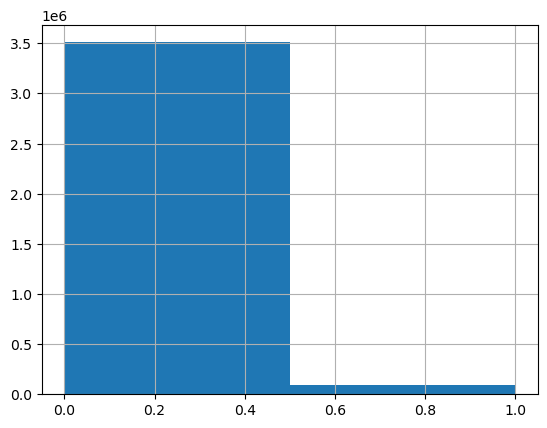

In [9]:
odata_test['packet_label'].hist(bins=2)

21507
[2398797614, 2398826190, 880001042, 225151496, 879998594, 225150984, 880002297, 1248901760, 2714209182, 217907565]


<Axes: >

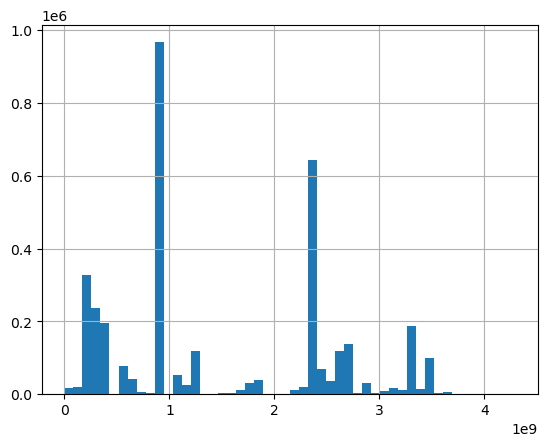

In [10]:
print(len(odata_test['inside_ip_dst'].unique()))
top_ten_ip_dst = odata_test['inside_ip_dst'].value_counts()[:10].index.tolist()
print(top_ten_ip_dst)
odata_test['inside_ip_dst'].hist(bins=50)

In [11]:
from socket import inet_ntoa
from struct import pack

odata_test['inside_ipv4'] = odata_test['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
top_ten_ipv4_dst = odata_test['inside_ipv4'].value_counts()[:10].index.tolist()
print(top_ten_ipv4_dst)

['142.250.191.46', '142.251.46.206', '52.115.192.18', '13.107.138.8', '52.115.182.130', '13.107.136.8', '52.115.196.249', '74.112.186.128', '161.199.139.158', '12.253.1.109']


In [12]:
def get_domain_name(ip_address):
    try:
        hostname = socket.gethostbyaddr(ip_address)[0]
        return hostname
    except socket.herror:
        return "No domain name found"
print([get_domain_name(ip) for ip in top_ten_ipv4_dst])

['nuq04s42-in-f14.1e100.net', 'nuq04s45-in-f14.1e100.net', 'No domain name found', 'No domain name found', 'No domain name found', 'No domain name found', 'No domain name found', 'No domain name found', 'zoomsvb158mmr.zoomgov.com', 'No domain name found']


In [13]:
ip_counts = odata_test['inside_ipv4'].value_counts()

In [14]:
ip_counts

inside_ipv4
142.250.191.46    336702
142.251.46.206    148825
52.115.192.18     136001
13.107.138.8      101376
52.115.182.130    100372
                   ...  
52.115.252.101         1
44.242.3.166           1
216.229.4.66           1
198.51.44.74           1
52.61.64.235           1
Name: count, Length: 21507, dtype: int64

<Axes: xlabel='inside_ipv4'>

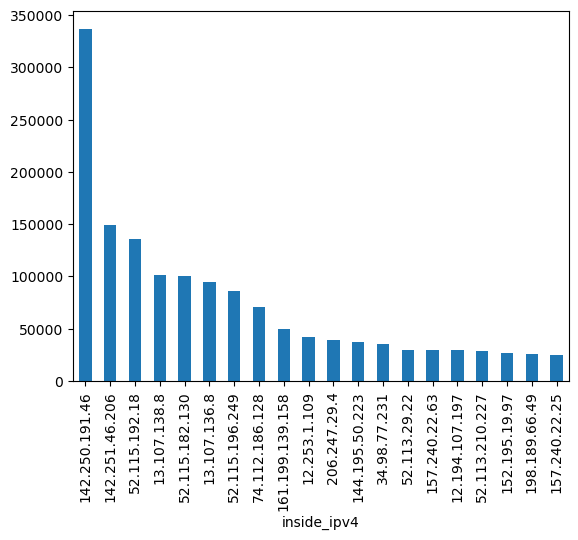

In [15]:
ip_counts[:20].plot(kind='bar')

In [16]:
odata_test['time'] = odata_test['inside_timestamp'].apply(datetime.fromtimestamp)

In [17]:
print(len(odata_test['time'].unique()))

3586908


In [18]:
time_counts = odata_test['time'].dt.round('S').value_counts()

<Axes: xlabel='time'>

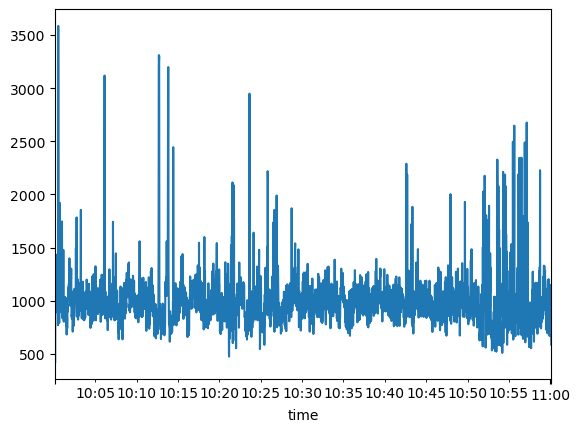

In [19]:
time_counts.sort_index(inplace=True)
time_counts.plot()

In [20]:
odata_test_blocked = odata_test[odata_test.packet_label == 1]

In [21]:
blocked_time_counts = odata_test_blocked['time'].dt.floor('2min').value_counts()

In [22]:
print(blocked_time_counts)

time
2022-12-12 10:04:00    5238
2022-12-12 10:02:00    3782
2022-12-12 10:58:00    3618
2022-12-12 10:18:00    3561
2022-12-12 10:40:00    3485
2022-12-12 10:00:00    3433
2022-12-12 10:24:00    3381
2022-12-12 10:32:00    3364
2022-12-12 10:28:00    3295
2022-12-12 10:30:00    3264
2022-12-12 10:06:00    3227
2022-12-12 10:38:00    3168
2022-12-12 10:56:00    3073
2022-12-12 10:34:00    3044
2022-12-12 10:26:00    2913
2022-12-12 10:20:00    2901
2022-12-12 10:36:00    2899
2022-12-12 10:22:00    2892
2022-12-12 10:08:00    2889
2022-12-12 10:14:00    2861
2022-12-12 10:54:00    2737
2022-12-12 10:10:00    2717
2022-12-12 10:52:00    2605
2022-12-12 10:16:00    2604
2022-12-12 10:46:00    2599
2022-12-12 10:50:00    2344
2022-12-12 10:44:00    2236
2022-12-12 10:48:00    2229
2022-12-12 10:42:00    2183
2022-12-12 10:12:00    1934
2022-12-12 11:00:00     219
Name: count, dtype: int64


<Axes: xlabel='time'>

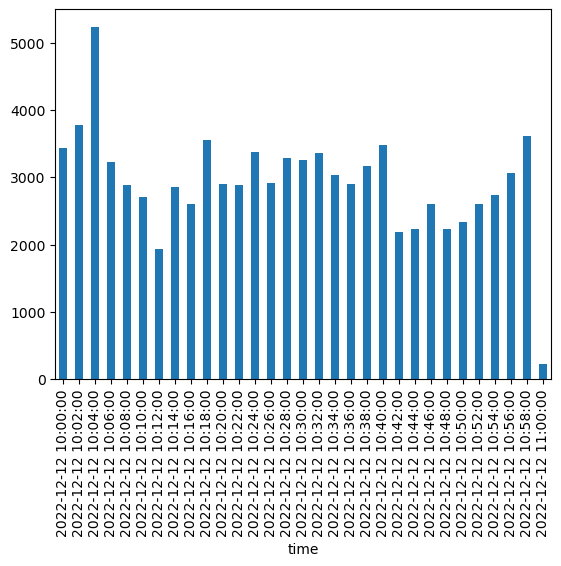

In [23]:
blocked_time_counts.sort_index(inplace=True)
blocked_time_counts.plot(kind='bar')

<Axes: xlabel='time'>

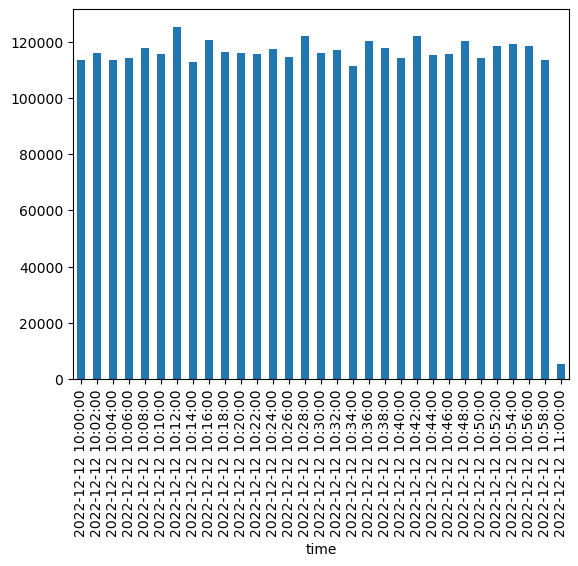

In [24]:
odata_test_allow = odata_test[odata_test.packet_label == 0]
allow_time_counts = odata_test_allow['time'].dt.floor('2min').value_counts()
allow_time_counts.sort_index(inplace=True)
allow_time_counts.plot(kind='bar')

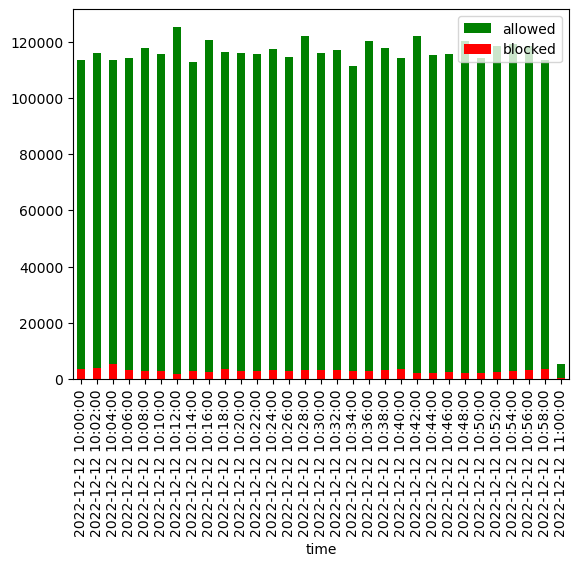

In [25]:
ax = allow_time_counts.plot(kind='bar', x='time', y='count', label='allowed', color='green')
blocked_time_counts.plot(ax=ax, kind='bar', x='time', y='count', label='blocked', color='red')
plt.legend()
plt.show()

53842
[61122, 60121, 50034, 60776, 50030, 50025, 443, 52168, 50022, 50039]


<Axes: >

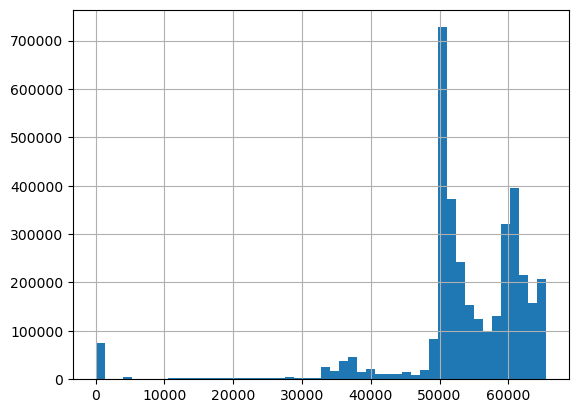

In [26]:
print(len(odata_test['inside_port_src'].unique()))
print(odata_test['inside_port_src'].value_counts()[:10].index.tolist())
odata_test['inside_port_src'].hist(bins=50)

11620
[443, 3480, 80, 8801, 3479, 3478, 53, 5555, 388, 993]


<Axes: >

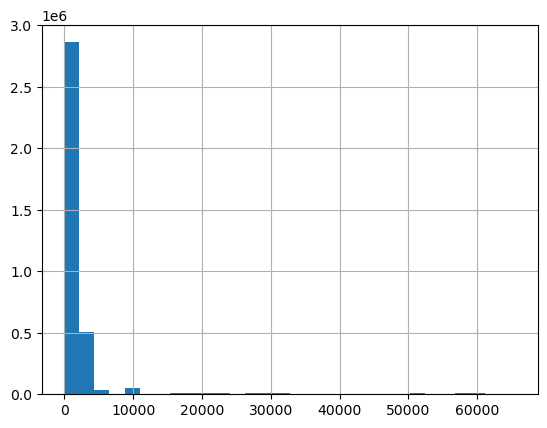

In [27]:
print(len(odata_test['inside_port_dst'].unique()))
print(odata_test['inside_port_dst'].value_counts()[:10].index.tolist())
odata_test['inside_port_dst'].hist(bins=30)

In [28]:
!ls

build_viz.py		outbound_concrete_dropout_predictions.parq
Combine Data.ipynb	_output
Data Exploration.ipynb	submit_proc.sh
data_processing.py	submit_read.sh
data_read.py		submit_split.sh
data_split.py		submit_viz.sh


In [29]:
odata_train=pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_train.parq')

In [30]:
odata_train

,packet_label,outside_timestamp,outside_ip_protocol,outside_ip_len,outside_ip_src,outside_ip_dst,outside_port_src,outside_port_dst,outside_tcp_win_size,outside_tcp_flags,...,inside_timestamp,inside_ip_protocol,inside_ip_len,inside_ip_src,inside_ip_dst,inside_port_src,inside_port_dst,inside_tcp_win_size,inside_tcp_flags,inside_ip_ttl
index,,,,,,,,,,,,,,,,,,,,,
6500,0,1.670260e+09,6,40,3449504226,389212613,21421,443,878,16,...,1.670260e+09,6,40,2887031409,389212613,45728,443,878,16,63
6501,0,1.670260e+09,6,40,3449504226,2354734384,55810,2938,24576,16,...,1.670260e+09,6,40,2887006254,2354734384,37934,2938,24576,16,63
6502,0,1.670260e+09,6,1406,3449504226,225150984,44882,443,512,16,...,1.670260e+09,6,1406,2887031328,225150984,57352,443,512,16,127
6503,0,1.670260e+09,17,164,3449504226,1803165471,18839,4500,0,0,...,1.670260e+09,17,164,2887028905,1803165471,4500,4500,0,0,63
6504,0,1.670260e+09,6,1028,3449504226,3472311308,29032,443,1026,24,...,1.670260e+09,6,1028,2887014695,3472311308,53656,443,1026,24,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27299992,0,1.670630e+09,6,1452,3449504226,1248901760,35431,443,1020,16,...,1.670630e+09,6,1452,2887018785,1248901760,59927,443,1020,16,127
27299993,0,1.670630e+09,6,40,3449504226,886737192,22558,443,64768,16,...,1.670630e+09,6,40,2886998002,886737192,25391,443,64768,16,64
27299995,0,1.670630e+09,6,1480,3449504226,225150984,13039,443,1029,16,...,1.670630e+09,6,1480,2887018953,225150984,59544,443,1029,16,127


In [31]:
odata_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12283800 entries, 6500 to 27299998
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   packet_label          uint8  
 1   outside_timestamp     float64
 2   outside_ip_protocol   uint8  
 3   outside_ip_len        uint16 
 4   outside_ip_src        uint32 
 5   outside_ip_dst        uint32 
 6   outside_port_src      uint16 
 7   outside_port_dst      uint16 
 8   outside_tcp_win_size  uint32 
 9   outside_tcp_flags     uint16 
 10  outside_ip_ttl        uint8  
 11  inside_timestamp      float64
 12  inside_ip_protocol    uint8  
 13  inside_ip_len         uint16 
 14  inside_ip_src         uint32 
 15  inside_ip_dst         uint32 
 16  inside_port_src       uint16 
 17  inside_port_dst       uint16 
 18  inside_tcp_win_size   uint32 
 19  inside_tcp_flags      uint16 
 20  inside_ip_ttl         uint8  
dtypes: float64(2), uint16(8), uint32(6), uint8(5)
memory usage: 808.3 MB


In [32]:
odata_train['time'] = odata_train['inside_timestamp'].apply(datetime.fromtimestamp)

In [33]:
date5 = odata_train[odata_train['time'].dt.day == 5]
date6 = odata_train[odata_train['time'].dt.day == 6]
date7 = odata_train[odata_train['time'].dt.day == 7]

In [34]:
time_counts_train5 = date5['time'].dt.minute.value_counts().sort_index()
time_counts_train6 = date6['time'].dt.minute.value_counts().sort_index()
time_counts_train7 = date7['time'].dt.minute.value_counts().sort_index()

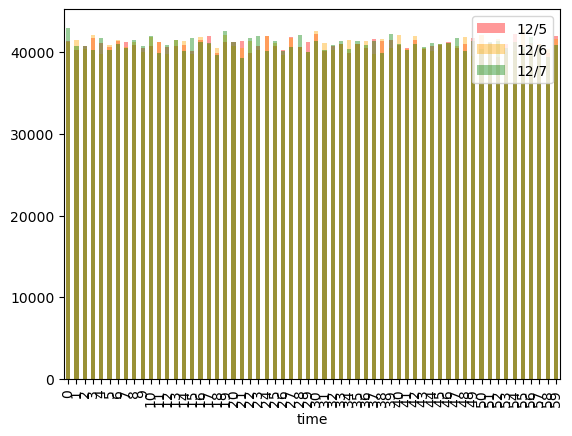

In [35]:
ax5 = time_counts_train5.plot(kind='bar', x='time', y='count', label='12/5', color='r', alpha=0.4)
ax6 = time_counts_train6.plot(kind='bar', x='time', y='count', label='12/6', color='orange', alpha=0.4)
ax7 = time_counts_train7.plot(kind='bar', x='time', y='count', label='12/7', color='g', alpha=0.4)
plt.legend()
plt.show()

In [36]:
date5_blocked = date5[date5.packet_label == 1]
date6_blocked = date6[date6.packet_label == 1]
date7_blocked = date7[date7.packet_label == 1]

date5_allow = date5[date5.packet_label == 0]
date6_allow = date6[date6.packet_label == 0]
date7_allow = date7[date7.packet_label == 0]

In [37]:
date5_allow_counts = date5_allow['time'].dt.minute.value_counts().sort_index()
date6_allow_counts = date6_allow['time'].dt.minute.value_counts().sort_index()
date7_allow_counts = date7_allow['time'].dt.minute.value_counts().sort_index()

In [38]:
date5_blocked_counts = date5_blocked['time'].dt.minute.value_counts().sort_index()
date6_blocked_counts = date6_blocked['time'].dt.minute.value_counts().sort_index()
date7_blocked_counts = date7_blocked['time'].dt.minute.value_counts().sort_index()

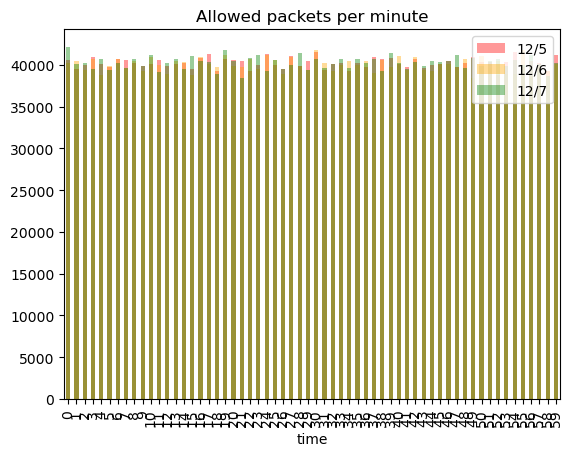

In [39]:
ax5 = date5_allow_counts.plot(kind='bar', x='time', y='count', label='12/5', color='red', alpha=0.4)
ax6 = date6_allow_counts.plot(kind='bar', x='time', y='count', label='12/6', color='orange', alpha=0.4)
ax7 = date7_allow_counts.plot(kind='bar', x='time', y='count', label='12/7', color='green', alpha=0.4)
plt.title('Allowed packets per minute')
plt.legend()
plt.show()

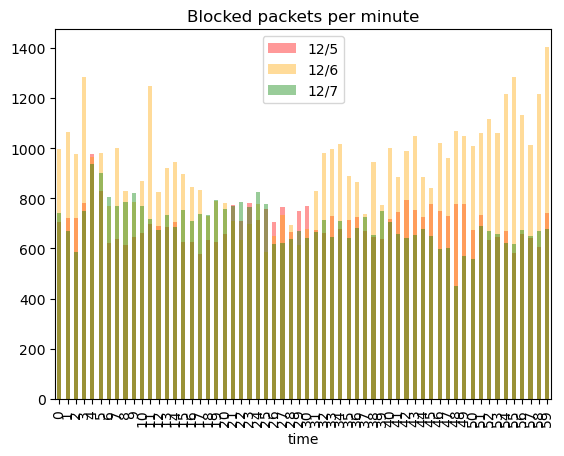

In [40]:
ax51 = date5_blocked_counts.plot(kind='bar', x='time', y='count', label='12/5', color='red', alpha=0.4)
ax61 = date6_blocked_counts.plot(kind='bar', x='time', y='count', label='12/6', color='orange', alpha=0.4)
ax71 = date7_blocked_counts.plot(kind='bar', x='time', y='count', label='12/7', color='green', alpha=0.4)
plt.title('Blocked packets per minute')
plt.legend()
plt.show()

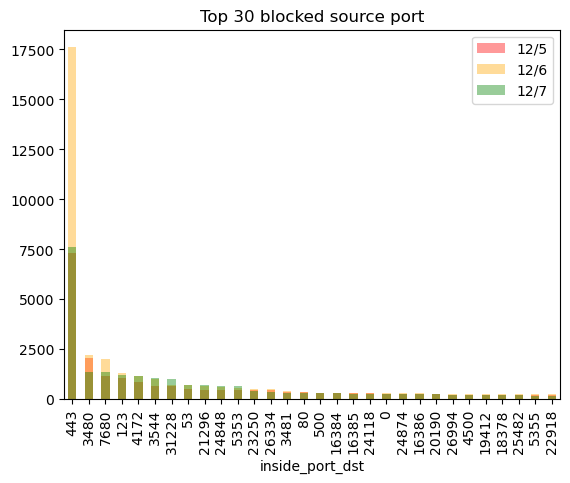

In [41]:
ax52 = date5_blocked['inside_port_dst'].value_counts()[:30].plot(kind='bar', label='12/5', color='red', alpha=0.4)
ax62 = date6_blocked['inside_port_dst'].value_counts()[:30].plot(kind='bar', label='12/6', color='orange', alpha=0.4)
ax63 = date7_blocked['inside_port_dst'].value_counts()[:30].plot(kind='bar', label='12/7', color='green', alpha=0.4)
plt.title('Top 30 blocked source port')
plt.legend()
plt.show()

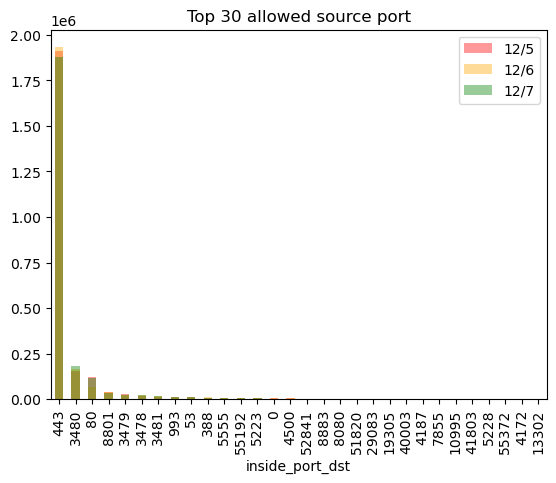

In [42]:
ax52 = date5_allow['inside_port_dst'].value_counts()[0:30].plot(kind='bar', label='12/5', color='red', alpha=0.4)
ax62 = date6_allow['inside_port_dst'].value_counts()[0:30].plot(kind='bar', label='12/6', color='orange', alpha=0.4)
ax63 = date7_allow['inside_port_dst'].value_counts()[0:30].plot(kind='bar', label='12/7', color='green', alpha=0.4)
plt.title('Top 30 allowed source port')
plt.legend()
plt.show()

In [43]:
date5_allow['inside_ipv4'] = date5_allow['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
date6_allow['inside_ipv4'] = date6_allow['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
date7_allow['inside_ipv4'] = date7_allow['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))

tt5a_ipv4_dst = date5_allow['inside_ipv4'].value_counts()[:30].index.tolist()
tt6a_ipv4_dst = date6_allow['inside_ipv4'].value_counts()[:30].index.tolist()
tt7a_ipv4_dst = date7_allow['inside_ipv4'].value_counts()[:30].index.tolist()

/tmp/ipykernel_74996/3564317028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date5_allow['inside_ipv4'] = date5_allow['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
/tmp/ipykernel_74996/3564317028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date6_allow['inside_ipv4'] = date6_allow['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
/tmp/ipykernel_74996/3564317028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

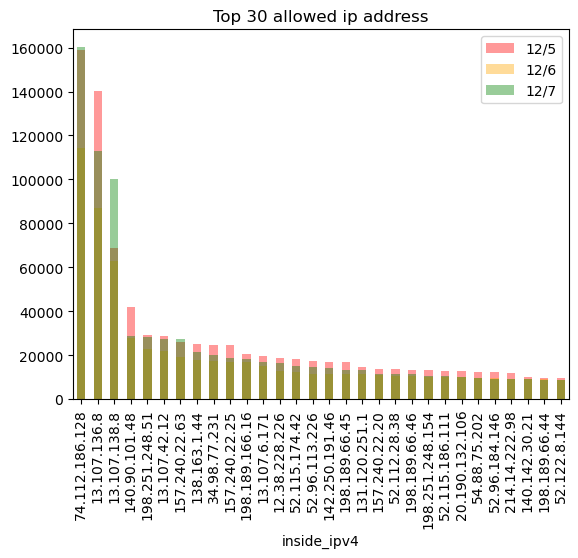

In [44]:
ax52 = date5_allow['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/5', color='red', alpha=0.4)
ax62 = date6_allow['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/6', color='orange', alpha=0.4)
ax63 = date7_allow['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/7', color='green', alpha=0.4)
plt.title('Top 30 allowed ip address')
plt.legend()
plt.show()

In [45]:
date5_blocked['inside_ipv4'] = date5_blocked['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
date6_blocked['inside_ipv4'] = date6_blocked['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
date7_blocked['inside_ipv4'] = date7_blocked['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))

tt5b_ipv4_dst = date5_blocked['inside_ipv4'].value_counts()[:30].index.tolist()
tt6b_ipv4_dst = date6_blocked['inside_ipv4'].value_counts()[:30].index.tolist()
tt7b_ipv4_dst = date7_blocked['inside_ipv4'].value_counts()[:30].index.tolist()

/tmp/ipykernel_74996/3417321031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date5_blocked['inside_ipv4'] = date5_blocked['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
/tmp/ipykernel_74996/3417321031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date6_blocked['inside_ipv4'] = date6_blocked['inside_ip_dst'].apply(lambda x: inet_ntoa(pack('!I', x)))
/tmp/ipykernel_74996/3417321031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

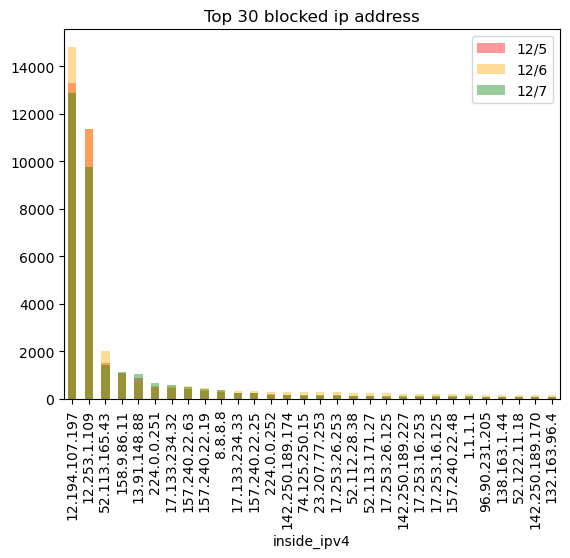

In [46]:
ax52 = date5_blocked['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/5', color='red', alpha=0.4)
ax62 = date6_blocked['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/6', color='orange', alpha=0.4)
ax63 = date7_blocked['inside_ipv4'].value_counts()[0:30].plot(kind='bar', label='12/7', color='green', alpha=0.4)
plt.title('Top 30 blocked ip address')
plt.legend()
plt.show()

In [136]:
!ls

build_viz.py		outbound_concrete_dropout_predictions.parq
Combine Data.ipynb	_output
Data Exploration.ipynb	submit_proc.sh
data_processing.py	submit_read.sh
data_read.py		submit_split.sh
data_split.py		submit_viz.sh


In [118]:
o_train = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_train.parq')
o_train['time'] = o_train['inside_timestamp'].apply(datetime.fromtimestamp)
train_blocked = o_train[o_train.packet_label == 1]
train_allow = o_train[o_train.packet_label == 0]

In [119]:
o_val = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_val.parq')
o_val['time'] = o_val['inside_timestamp'].apply(datetime.fromtimestamp)
val_blocked = o_val[o_val.packet_label == 1]
val_allow = o_val[o_val.packet_label == 0]

In [120]:
o_test = pd.read_parquet('/data/alexander.huang/data/0903_data/outbound_read_test.parq')
o_test['time'] = o_test['inside_timestamp'].apply(datetime.fromtimestamp)
test_blocked = o_test[o_test.packet_label == 1]
test_allow = o_test[o_test.packet_label == 0]

In [124]:
va = val_allow['inside_port_dst'].value_counts().values
ta = test_allow['inside_port_dst'].value_counts().values
tra = train_allow['inside_port_dst'].value_counts().values

vmin=np.min(va)
vmax=np.max(va)
tmin=np.min(ta)
tmax=np.max(ta)
tramin=np.min(tra)
tramax=np.max(tra)

v_mean=np.mean(va)
v_std=np.std(va)
t_mean=np.mean(ta)
t_std=np.std(ta)
tr_mean=np.mean(tra)
tr_std=np.std(tra)

def scale_val(x):
    #return (x-v_mean)/v_std
    #return (x-vmin)/(vmax-vmin)
    return x/len(o_val)*100

def scale_tst(x):
    #return (x-t_mean)/t_std
    #return (x-tmin)/(tmax-tmin)
    return x/len(o_test)*100

def scale_train(x):
    #return (x-tr_mean/tr_std)
    #return (x-tramin)/(tramax-tramin)
    return x/len(o_train)*100

val_allow_norm = pd.DataFrame()
val_allow_norm.index = val_allow['inside_port_dst'].value_counts().index
val_allow_norm['validation'] = np.apply_along_axis(scale_val, 0, val_allow['inside_port_dst'].value_counts().values)

test_allow_norm = pd.DataFrame()
test_allow_norm.index = test_allow['inside_port_dst'].value_counts().index
test_allow_norm['test'] = np.apply_along_axis(scale_tst, 0, test_allow['inside_port_dst'].value_counts().values)

train_allow_norm = pd.DataFrame()
train_allow_norm.index = train_allow['inside_port_dst'].value_counts().index
train_allow_norm['train'] = np.apply_along_axis(scale_train, 0, train_allow['inside_port_dst'].value_counts().values)

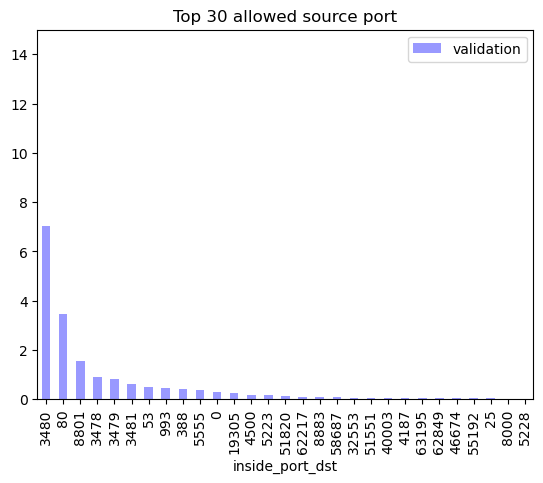

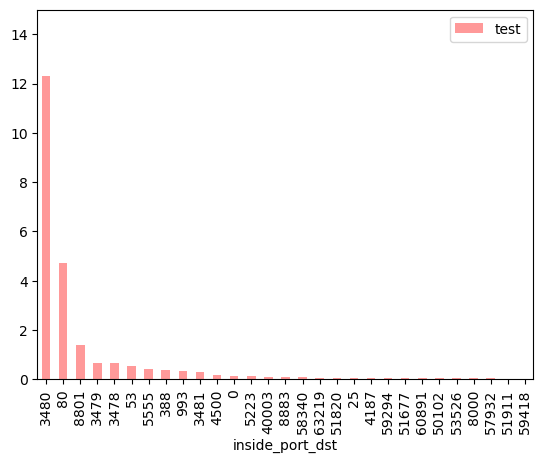

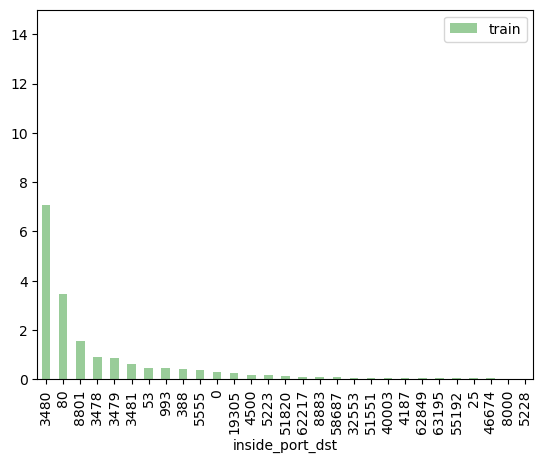

In [130]:
a = val_allow_norm[1:30].plot(kind='bar', label='12/7 val', color='b', alpha=0.4)
plt.title('Top 30 allowed source port')
plt.ylim(0,15)
b = test_allow_norm[1:30].plot(kind='bar', label='12/8 test', color='red', alpha=0.4)
plt.ylim(0,15)
c = train_allow_norm[1:30].plot(kind='bar', label='train', color='green', alpha=0.4)
plt.ylim(0,15)
plt.legend()
plt.show()

In [137]:
print(val_allow_norm)
print(test_allow_norm)
print(train_allow_norm)

                 validation
inside_port_dst            
443               77.046845
3480               7.017421
80                 3.448470
8801               1.556946
3478               0.909310
...                     ...
50489              0.000073
60958              0.000073
40128              0.000073
28204              0.000073
64631              0.000073

[12061 rows x 1 columns]
                      test
inside_port_dst           
443              72.952444
3480             12.308722
80                4.734889
8801              1.398250
3479              0.661000
...                    ...
44350             0.000028
62754             0.000028
63692             0.000028
31303             0.000028
64836             0.000028

[11132 rows x 1 columns]
                     train
inside_port_dst           
443              76.997216
3480              7.063490
80                3.462634
8801              1.551360
3478              0.901488
...                    ...
4704             

In [126]:
vb = val_blocked['inside_port_dst'].value_counts().values
tb = test_blocked['inside_port_dst'].value_counts().values
trb = train_blocked['inside_port_dst'].value_counts().values

vmin=np.min(vb)
vmax=np.max(vb)
tmin=np.min(tb)
tmax=np.max(tb)
tramax=np.max(trb)
tramin=np.min(trb)
v_mean=np.mean(vb)
v_std=np.std(vb)
t_mean=np.mean(tb)
t_std=np.std(tb)
tra_mean=np.mean(trb)
tra_std=np.std(trb)

def scale_val(x):
    #return (x-v_mean)/v_std
    #return (x-vmin)/(vmax-vmin)
    return x/len(o_val)*100


def scale_tst(x):
    #return (x-t_mean)/t_std
    #return (x-tmin)/(tmax-tmin)
    return x/len(o_test)*100

def scale_train(x):
    #return (x-tra_mean)/tra_std
    #return (x-tramin)/(tramax-tramin)
    return x/len(o_train)*100
    
    
val_bl_norm = pd.DataFrame()
val_bl_norm.index = val_blocked['inside_port_dst'].value_counts().index
val_bl_norm['validation'] = np.apply_along_axis(scale_val, 0, val_blocked['inside_port_dst'].value_counts().values)

test_bl_norm = pd.DataFrame()
test_bl_norm.index = test_blocked['inside_port_dst'].value_counts().index
test_bl_norm['test'] = np.apply_along_axis(scale_tst, 0, test_blocked['inside_port_dst'].value_counts().values)

train_bl_norm = pd.DataFrame()
train_bl_norm.index = train_blocked['inside_port_dst'].value_counts().index
train_bl_norm['train'] = np.apply_along_axis(scale_train, 0, train_blocked['inside_port_dst'].value_counts().values)

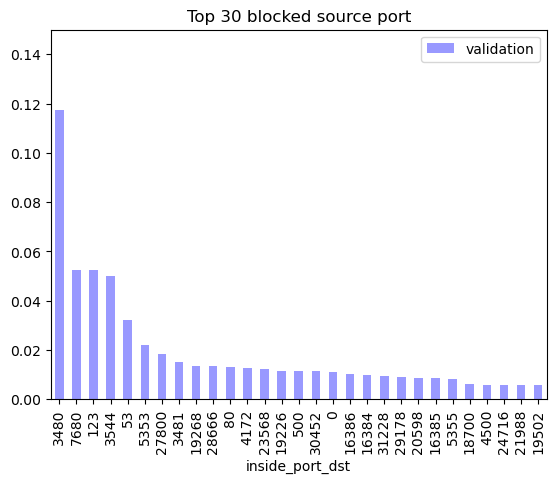

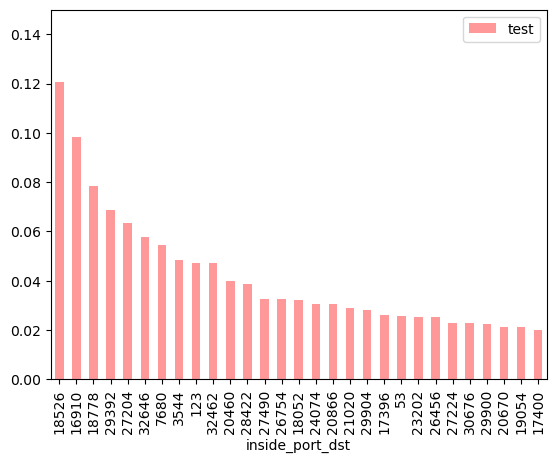

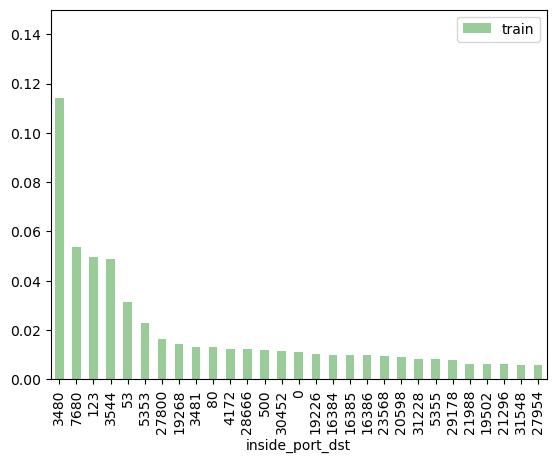

In [131]:
ax7 = val_bl_norm[1:30].plot(kind='bar', label='12/7 val', color='blue', alpha=0.4)
plt.title('Top 30 blocked source port')
plt.ylim(0,.15)
ax8 = test_bl_norm[1:30].plot(kind='bar', label='12/8 test', color='red', alpha=0.4)
plt.ylim(0,.15)
ax9 = train_bl_norm[1:30].plot(kind='bar', label='train', color='green', alpha=0.4)
plt.ylim(0,.15)

plt.legend()
plt.show()

In [138]:
print(val_bl_norm)
print(test_bl_norm)
print(train_bl_norm)

                 validation
inside_port_dst            
443                0.361953
3480               0.117333
7680               0.052481
123                0.052335
3544               0.050066
...                     ...
21070              0.000073
16598              0.000073
24033              0.000073
26778              0.000073
19618              0.000073

[3041 rows x 1 columns]
                     test
inside_port_dst          
443              0.249139
18526            0.120500
16910            0.098389
18778            0.078444
29392            0.068806
...                   ...
20883            0.000028
5776             0.000028
20513            0.000028
31383            0.000028
30957            0.000028

[584 rows x 1 columns]
                    train
inside_port_dst          
443              0.370374
3480             0.113955
7680             0.053542
123              0.049700
3544             0.048649
...                   ...
28691            0.000008
32126          